In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import functions as f

In [2]:
tickers_list = ['AAPL']
data = yf.download(tickers_list, start="2020-01-01", end="2024-01-01")['Close']

[*********************100%***********************]  1 of 1 completed


In [5]:
price_series = data[data.columns[0]]
labelled_series = f.triple_barrier_labelling(
    price_series=price_series, 
    upper_barrier=1, 
    lower_barrier=0.5, 
    vertical_barrier=10, 
    volatility_function='observed'
)
indexed_events = f.rescaled_cusum_filter(price_series=price_series, threshold=0.1)

data['label'] = labelled_series
data_cut = data.loc['2021-01-01':'2022-01-01']

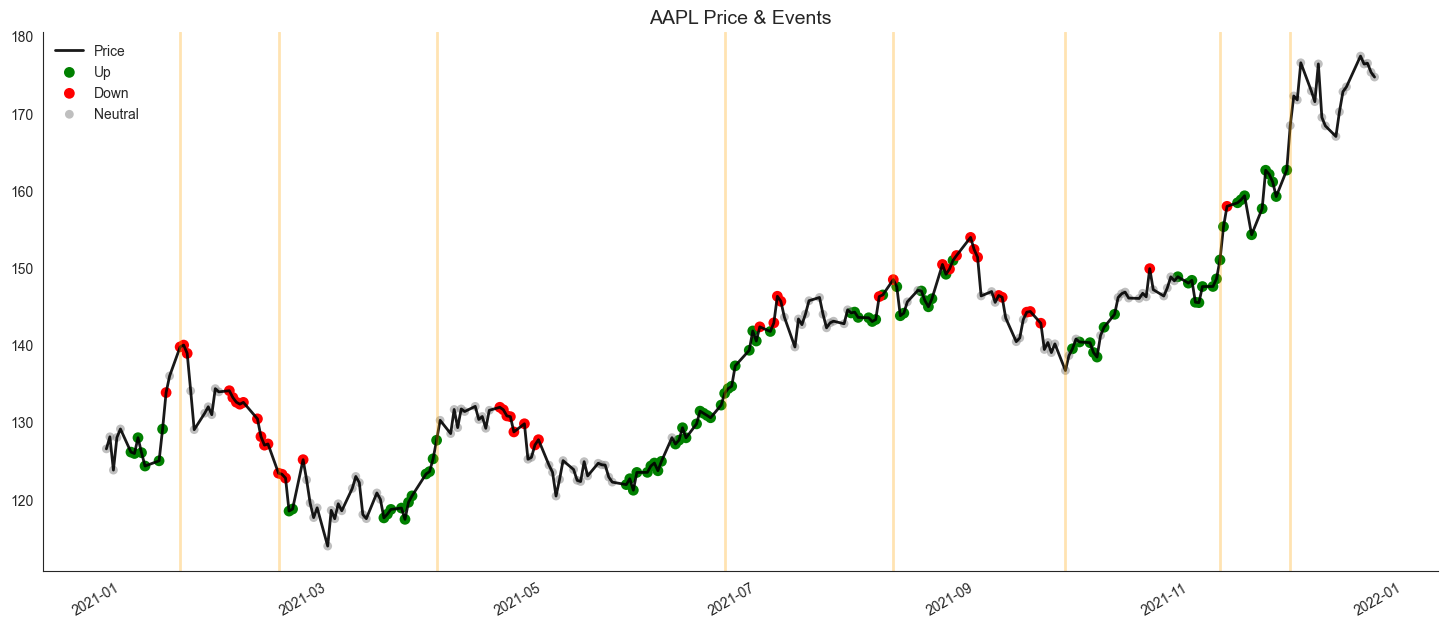

In [6]:
asset = data_cut.columns[0]

sns.set_style("white")
fig, ax = plt.subplots(figsize=(18, 7))
ax.plot(data_cut.index, data_cut[asset], color='black', linewidth=2, alpha=0.9, label='Price')

ax.scatter(data_cut.index[data_cut['label'] == 1], data_cut[asset][data_cut['label'] == 1], 
           color='green', s=60, edgecolors='none', label='Up')

ax.scatter(data_cut.index[data_cut['label'] == -1], data_cut[asset][data_cut['label'] == -1], 
           color='red', s=60, edgecolors='none', label='Down')

ax.scatter(data_cut.index[data_cut['label'] == 0], data_cut[asset][data_cut['label'] == 0], 
           color='gray', s=40, edgecolors='none', alpha=0.5, label='Neutral')

for event_date in indexed_events:
    if event_date in data_cut.index:
        ax.axvline(event_date, color='orange', alpha=0.3, linewidth=2)

ax.set_title(f"{asset} Price & Events", fontsize=14, fontweight='medium')
ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=10, loc='upper left', frameon=False)
plt.show()